# Filtering & Data Prep

In [16]:
import importlib
from pathlib import Path

import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline


import preprocess as pp
import models
import engine

In [17]:
importlib.reload(pp)
importlib.reload(models)
importlib.reload(engine)

<module 'engine' from '/Users/davidspector/Home/UCSD/py_cnn/data-science/engine.py'>

In [18]:
DF_DIR = Path("/Volumes/CREST Data/David_S_Data/ExactData/Downloaded_Pkl")
BATCH_SIZE = 15
EPOCHS = 400
N_FOLDS = np.array([5,6,7,8,9,10,11,12,13,14,15]) #[1,2,3,4,5,6,7,8,9,10]

In [19]:
train_df = pd.read_pickle(DF_DIR / Path('Train_df-PS04_snapshot01.pkl'))
test_df = pd.read_pickle(DF_DIR / Path('Test_df-PS04_snapshot01.pkl'))
val_df = pd.read_pickle(DF_DIR / Path('Val_df-PS04_snapshot01.pkl'))

In [20]:
combined_df = pd.concat([train_df, test_df, val_df])
del train_df, test_df, val_df

In [21]:
train_df, valid_df = pp.hospital_stratify(combined_df,0.2)
# valid_df, test_df = pp.hospital_stratify(valid_df, 0.5)
test_df = valid_df

In [22]:
del combined_df

In [23]:
x_train_4D, y_train_4D, x_valid_4D, y_valid_4D, x_test_4D, y_test_4D, pct_cancer_weights, psa_train, psa_valid, psa_test = pp.create_4D(train_df, valid_df, test_df, 'PS', sub_gain=0)

100%|██████████| 1522/1522 [00:00<00:00, 1126673.26it/s]


In [24]:
del train_df, valid_df, test_df

In [25]:
x_test_4D, y_test_4D, psa_test = pp.filter_data(x_test_4D, y_test_4D, psa_test)

In [26]:
x_train_4D = pp.data_norm_stand(x_train_4D)
x_valid_4D = pp.data_norm_stand(x_valid_4D)
x_test_4D = pp.data_norm_stand(x_test_4D)

In [27]:
Xa, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'a')
Xb, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'b')
Xc, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'c')
Xd, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'d')
Xe, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'e')
Xf, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'f')
Xg, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'g')
Xh, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'h')
Xi, Y = pp.resample_augment(x_train_4D, np.array(0), y_train_4D,'i')
x_train = [Xa,Xb,Xc,Xd,Xe,Xf,psa_train]
y_train = Y

Xva, Yv = pp.resample_augment(x_valid_4D, Xa, y_valid_4D,'a')
Xvb, Yv = pp.resample_augment(x_valid_4D, Xb, y_valid_4D,'b')
Xvc, Yv = pp.resample_augment(x_valid_4D, Xc, y_valid_4D,'c')
Xvd, Yv = pp.resample_augment(x_valid_4D, Xd, y_valid_4D,'d')
Xve, Yv = pp.resample_augment(x_valid_4D, Xe, y_valid_4D,'e')
Xvf, Yv = pp.resample_augment(x_valid_4D, Xf, y_valid_4D,'f')
Xvg, Yv = pp.resample_augment(x_valid_4D, Xg, y_valid_4D,'g')
Xvh, Yv = pp.resample_augment(x_valid_4D, Xh, y_valid_4D,'h')
Xvi, Yv = pp.resample_augment(x_valid_4D, Xi, y_valid_4D,'i')
x_valid = [Xva,Xvb,Xvc,Xvd,Xve,Xvf,psa_valid]
y_valid = Yv

Xta, Yt = pp.resample_augment(x_test_4D, Xa, y_test_4D,'a')
Xtb, Yt = pp.resample_augment(x_test_4D, Xb, y_test_4D,'b')
Xtc, Yt = pp.resample_augment(x_test_4D, Xc, y_test_4D,'c')
Xtd, Yt = pp.resample_augment(x_test_4D, Xd, y_test_4D,'d')
Xte, Yt = pp.resample_augment(x_test_4D, Xe, y_test_4D,'e')
Xtf, Yt = pp.resample_augment(x_test_4D, Xf, y_test_4D,'f')
Xtg, Yt = pp.resample_augment(x_test_4D, Xg, y_test_4D,'g')
Xth, Yt = pp.resample_augment(x_test_4D, Xh, y_test_4D,'h')
Xti, Yt = pp.resample_augment(x_test_4D, Xi, y_test_4D,'i')
x_test = [Xta,Xtb,Xtc,Xtd,Xte,Xtf,psa_test]
y_test = Yt


/Users/davidspector/Home/UCSD/py_cnn/data-science/preprocess.py:54: RuntimeWarning: Mean of empty slice.
  mean_all_x = x_data.mean()
/Users/davidspector/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in divide
  ret = arr.dtype.type(ret / rcount)


In [28]:
del Xa, Xb, Xc, Xd, Xe, Xf, Xg, Xh, Xi, Y
del Xva, Xvb, Xvc, Xvd, Xve, Xvf, Xvg, Xvh, Xvi, Yv
del Xta, Xtb, Xtc, Xtd, Xte, Xtf, Xtg, Xth, Xti
del x_train_4D, y_train_4D, x_valid_4D, y_valid_4D, x_test_4D, y_test_4D

# Training

In [29]:
workdir = "/Users/davidspector/Home/UCSD/py_cnn/data-science/models-out/"
log_dir = Path("/Users/davidspector/Home/UCSD/py_cnn/data-science/logs/")
batch_size = 256
epochs = 400
nFold = np.array([5,6,7,8,9,10,11,12,13,14,15])

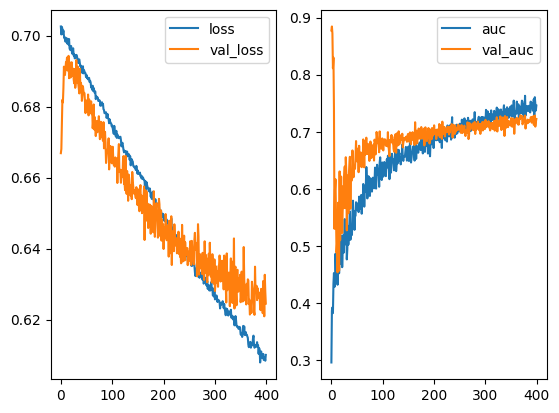

25/25 ━━━━━━━━━━━━━━━━━━━━ 103s 4s/step - auc: 0.7480 - loss: 0.6090 - val_auc: 0.7224 - val_loss: 0.6245 - learning_rate: 1.0000e-06


In [33]:
import utils
importlib.reload(utils)
importlib.reload(models)
importlib.reload(engine)
# 2 zeros removed
# classic overfitting at 60/40 --> good-ish
full_model = models.model_3d_00(x_train[0], y_train, psa_train, workdir)
full_model, history = engine.train_model(full_model, x_train, y_train, x_valid, y_valid, batch_size, epochs, pct_cancer_weights, log_dir) #0.0008 ,Xe,Xf,,Xve,Xvf